# LNAS Lab 2

## 0. Setup

In [96]:
from numpy import *
from matplotlib import pyplot as plt

In [97]:
# Set up pyplot
plt.rcParams['text.usetex'] = True

In [98]:
# Custom plots

def custom_plot(title="Plot", xlabel="x", ylabel="y", xlim=None, ylim=None, **kwargs):
    fig = plt.figure()
    ax = fig.subplots()

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if ylim: ax.set_ylim(*ylim)
    if xlim: ax.set_xlim(*xlim)

    ax.grid(True)
    ax.spines[['top', 'right']].set_alpha(0.3)

    return fig, ax

In [99]:
# Custom functions

def dB(x):
    return 10 * log10(abs(x))

def dB2(x):
    return 20 * log10(abs(x))

## 1.1.4. Specification masks and current responses

In [100]:
# Specification parameters

f1 = 800 # Hz
f2 = 1200 # Hz
αp = 0.5 # dB
αc = 10 # dB

In [101]:
# Plot parameters

f0 = 1
fm = 5000
fstep = 1.01
flim = (f0, fm)
frange = linspace(f0, f0+fstep*((fm-0)//fstep), int((fm-f0)//fstep)+1)

α0 = 0
αm = 15
αlim = (α0, αm)

### Low-pass Filter

In [102]:
# Circuit parameters
C_lpf = 6.4e-6 # F
R3   = 50 # Ω
RL   = 50 # Ω

In [103]:
# Transfer function & attenuation

def H_lpf(f): # Transfer function
    return 2/(R3 *(1/R3 + 1/RL + 2j*pi*f*C_lpf))

def att_lpf(f): # Attenuation
    return -dB2(H_lpf(f))

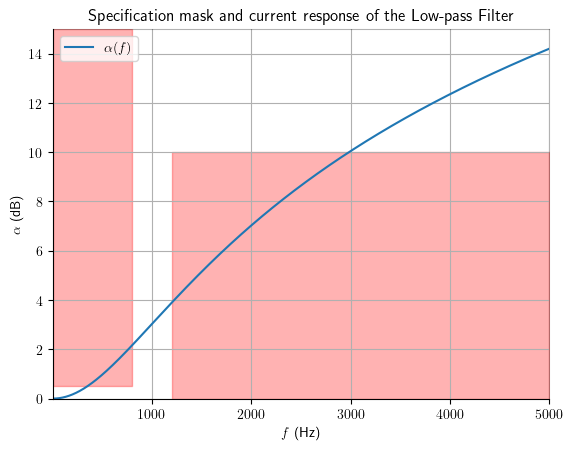

In [104]:
fig, ax = custom_plot(
    title=r'Specification mask and current response of the Low-pass Filter',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)

ax.fill_between((f0, f1), αp, αm, color='red', alpha=0.3) # Passband mask
ax.fill_between((f2, fm), αc, α0, color='red', alpha=0.3) # Stopband mask
ax.plot(frange, [att_lpf(f) for f in frange], label=r'$\alpha(f)$')
ax.legend()

fig.savefig('figures/fig1.1.4.1.svg')

### High-pass filter

In [105]:
# Circuit parameters
C_hpf = 1.6e-6 # F
R3    = 50 # Ω
RL    = 50 # Ω

In [106]:
# Transfer function & attenuation

def H_hpf(f): # Transfer function
    return 2/(1 + 1/RL * (R3 + 1/(2j*pi*f*C_hpf)))

def att_hpf(f): # Attenuation
    return -dB2(H_hpf(f))

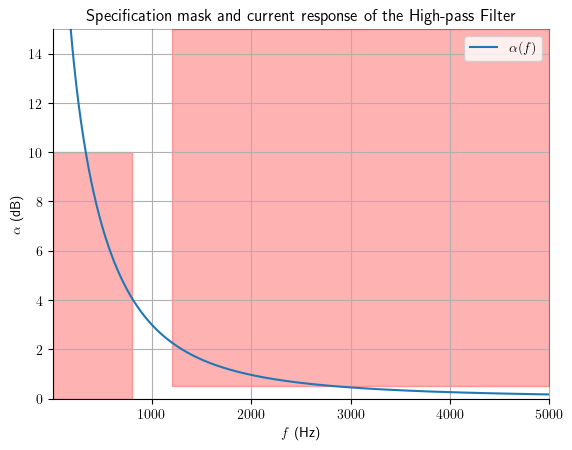

In [107]:
fig, ax = custom_plot(
    title=r'Specification mask and current response of the High-pass Filter',
    xlabel=r'$f$ (Hz)', ylabel=r'$\alpha$ (dB)', xlim=flim, ylim=αlim
)

ax.fill_between((f0, f1), αc, α0, color='red', alpha=0.3)
ax.fill_between((f2, fm), αp, αm, color='red', alpha=0.3)
ax.plot(frange, [att_hpf(f) for f in frange], label=r'$\alpha(f)$')
ax.legend()

fig.savefig('figures/fig1.1.4.2.svg')